Regional Sales Analysis

“Sales teams often lack a clear, data-driven understanding of regional performance, making it difficult to identify growth opportunities and optimize resources. This project aims to analyse and visualize regional sales data to uncover trends, evaluate profitability, and support strategic decision-making.”

In [2]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#import dataset
df_sales = pd.read_excel('/content/drive/MyDrive/Regional Sales Dataset.xlsx', sheet_name='Sales Orders')
df_customers = pd.read_excel('/content/drive/MyDrive/Regional Sales Dataset.xlsx', sheet_name='Customers')
df_regions = pd.read_excel('/content/drive/MyDrive/Regional Sales Dataset.xlsx', sheet_name='Regions')
df_state_regions = pd.read_excel('/content/drive/MyDrive/Regional Sales Dataset.xlsx', sheet_name='State Regions',skiprows=1) #Removed unclear headers to align column names
df_products = pd.read_excel('/content/drive/MyDrive/Regional Sales Dataset.xlsx', sheet_name='Products')
df_budgets = pd.read_excel('/content/drive/MyDrive/Regional Sales Dataset.xlsx', sheet_name='2017 Budgets')

In [5]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [6]:
df_sales.shape

(64104, 12)

In [7]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
dtypes: d

In [8]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [9]:
df_sales.describe()

,OrderDate,Customer Name Index,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
count,64104,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000
mean,2016-01-29 01:28:20.935979008,87.480064,495.086609,14.913141,8.441689,2284.380803,19280.682937,1432.083899
min,2014-01-01 00:00:00,1.000000,1.000000,1.000000,5.000000,167.500000,837.500000,68.675000
25%,2015-01-13 00:00:00,45.000000,247.000000,6.000000,6.000000,1031.800000,8019.900000,606.216000
50%,2016-01-27 00:00:00,87.000000,493.000000,15.000000,8.000000,1855.900000,14023.100000,1084.495500
75%,2017-02-13 00:00:00,130.000000,742.000000,24.000000,10.000000,3606.275000,27416.400000,2046.933750
max,2018-02-28 00:00:00,175.000000,994.000000,30.000000,12.000000,6566.000000,78711.600000,5498.556000
std,NaN,49.884946,285.645893,8.787032,2.276217,1663.598141,15429.602766,1107.705728


In [10]:
df_sales.nunique()

,0
OrderNumber,10684
OrderDate,1520
Customer Name Index,175
Channel,3
Currency Code,1
Warehouse Code,4
Delivery Region Index,993
Product Description Index,30
Order Quantity,8
Unit Price,664


In [11]:
df_customers.head()

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [12]:
df_customers.shape

(175, 2)

In [13]:
df_customers.isnull().sum()

,0
Customer Index,0
Customer Names,0


In [14]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer Index  175 non-null    int64 
 1   Customer Names  175 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [15]:
df_regions.head()

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [16]:
df_regions.shape

(994, 15)

In [17]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [18]:
df_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             994 non-null    int64  
 1   name           994 non-null    object 
 2   county         994 non-null    object 
 3   state_code     994 non-null    object 
 4   state          994 non-null    object 
 5   type           994 non-null    object 
 6   latitude       994 non-null    float64
 7   longitude      994 non-null    float64
 8   area_code      994 non-null    int64  
 9   population     994 non-null    int64  
 10  households     994 non-null    int64  
 11  median_income  994 non-null    int64  
 12  land_area      994 non-null    int64  
 13  water_area     994 non-null    int64  
 14  time_zone      994 non-null    object 
dtypes: float64(2), int64(7), object(6)
memory usage: 116.6+ KB


In [19]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [20]:
df_state_regions.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [21]:
df_state_regions.shape

(48, 3)

In [22]:
df_state_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State Code  48 non-null     object
 1   State       48 non-null     object
 2   Region      48 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [23]:
df_state_regions.isnull().sum()

,0
State Code,0
State,0
Region,0


In [24]:
df_products.head()

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [25]:
df_products.shape

(30, 2)

In [26]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Index         30 non-null     int64 
 1   Product Name  30 non-null     object
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes


In [27]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [28]:
df_budgets.head()

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [29]:
df_budgets.shape

(30, 2)

In [30]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  30 non-null     object 
 1   2017 Budgets  30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes


In [31]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


Merge Dataframes

In [32]:
#merging Keeps all rows from df_sales. Customers in df_customers without sales are excluded.
df_merged = pd.merge(df_sales, df_customers, left_on='Customer Name Index', right_on='Customer Index', how='left')
df_merged.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [33]:
#Merging product
df_merged = pd.merge(df_merged, df_products, left_on='Product Description Index', right_on='Index', how='left')
df_merged.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [34]:
#Merging Region
#Rows in df_regions with no matching Delivery Region Index in df_merged are excluded
df_merged = pd.merge(df_merged, df_regions, how="left", left_on="Delivery Region Index", right_on="id")
df_merged.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [35]:
#Merging state regions
df_merged = pd.merge(df_merged, df_state_regions, how="left", left_on="state_code", right_on="State Code")
df_merged.head()


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,State,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,Georgia,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Indiana,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,California,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Indiana,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Connecticut,Northeast


In [36]:
df_merged = pd.merge(df_merged, df_budgets, how="left", left_on="Product Name", right_on="Product Name")
df_merged.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,population,households,median_income,land_area,water_area,time_zone,State Code,State,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,145674,52798,36466,268318796,13908113,America/New York,GA,Georgia,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Indiana,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,79510,26020,124759,62489257,386195,America/Los Angeles,CA,California,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Indiana,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,58007,24141,63158,70972793,720300,America/New York,CT,Connecticut,Northeast,1085037.329


In [37]:
df_merged = df_merged.drop(columns=['Customer Name Index','Customer Index', 'Product Description Index', 'Index', 'state_code','Currency Code','latitude','longitude','state', 'State Code', 'id'])
df_merged.head()

,OrderNumber,OrderDate,Channel,Warehouse Code,Delivery Region Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names,...,area_code,population,households,median_income,land_area,water_area,time_zone,State,Region,2017 Budgets
0,SO - 000225,2014-01-01,Wholesale,AXW291,364,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,...,912,145674,52798,36466,268318796,13908113,America/New York,Georgia,South,964940.231
1,SO - 0003378,2014-01-01,Distributor,AXW291,488,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Indiana,Midwest,2067108.120
2,SO - 0005126,2014-01-01,Wholesale,AXW291,155,6,978.2,5869.2,684.740,Amerisourc Corp,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,California,West,5685138.270
3,SO - 0005614,2014-01-01,Export,AXW291,473,7,2338.3,16368.1,1028.852,Colgate-Pa Group,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Indiana,Midwest,889737.555
4,SO - 0005781,2014-01-01,Wholesale,AXW291,256,8,2291.4,18331.2,1260.270,Deseret Group,...,959,58007,24141,63158,70972793,720300,America/New York,Connecticut,Northeast,1085037.329


In [38]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   OrderNumber            64104 non-null  object        
 1   OrderDate              64104 non-null  datetime64[ns]
 2   Channel                64104 non-null  object        
 3   Warehouse Code         64104 non-null  object        
 4   Delivery Region Index  64104 non-null  int64         
 5   Order Quantity         64104 non-null  int64         
 6   Unit Price             64104 non-null  float64       
 7   Line Total             64104 non-null  float64       
 8   Total Unit Cost        64104 non-null  float64       
 9   Customer Names         64104 non-null  object        
 10  Product Name           64104 non-null  object        
 11  name                   64104 non-null  object        
 12  county                 64104 non-null  object        
 13  t

In [39]:
# Calculate profit
df_merged['Profit'] = df_merged['Line Total'] - df_merged['Total Unit Cost']
df_merged['Profit Margin'] = (df_merged['Profit'] / df_merged['Line Total']) * 100

# Summary stats for numerical columns
print(df_merged[['Order Quantity', 'Unit Price', 'Line Total', 'Profit', 'Profit Margin']].describe())

       Order Quantity    Unit Price    Line Total        Profit  Profit Margin
count    64104.000000  64104.000000  64104.000000  64104.000000   64104.000000
mean         8.441689   2284.380803  19280.682937  17848.599038      91.956156
std          2.276217   1663.598141  15429.602766  14493.981576       2.966668
min          5.000000    167.500000    837.500000    695.125000      83.000000
25%          6.000000   1031.800000   8019.900000   7326.450000      90.200000
50%          8.000000   1855.900000  14023.100000  12967.448000      92.555556
75%         10.000000   3606.275000  27416.400000  25144.597500      94.166667
max         12.000000   6566.000000  78711.600000  75801.522000      96.666667


In [40]:
df_2017 = df_merged[df_merged['OrderDate'].dt.year == 2017]
budget_comparison = df_2017.groupby('Product Name')['Line Total'].sum().reset_index()
budget_comparison = budget_comparison.merge(df_budgets, left_on='Product Name', right_on='Product Name')
budget_comparison['Variance'] = budget_comparison['Line Total'] - budget_comparison['2017 Budgets']
print(budget_comparison[['Product Name', 'Line Total', '2017 Budgets', 'Variance']].head())

  Product Name  Line Total  2017 Budgets      Variance
0    Product 1  12419361.2   3016489.209  9.402872e+06
1   Product 10   4126181.6    864331.624  3.261850e+06
2   Product 11   6104128.8   1230458.484  4.873670e+06
3   Product 12   6121582.3   1356976.996  4.764605e+06
4   Product 13  19757435.7   3720639.645  1.603680e+07


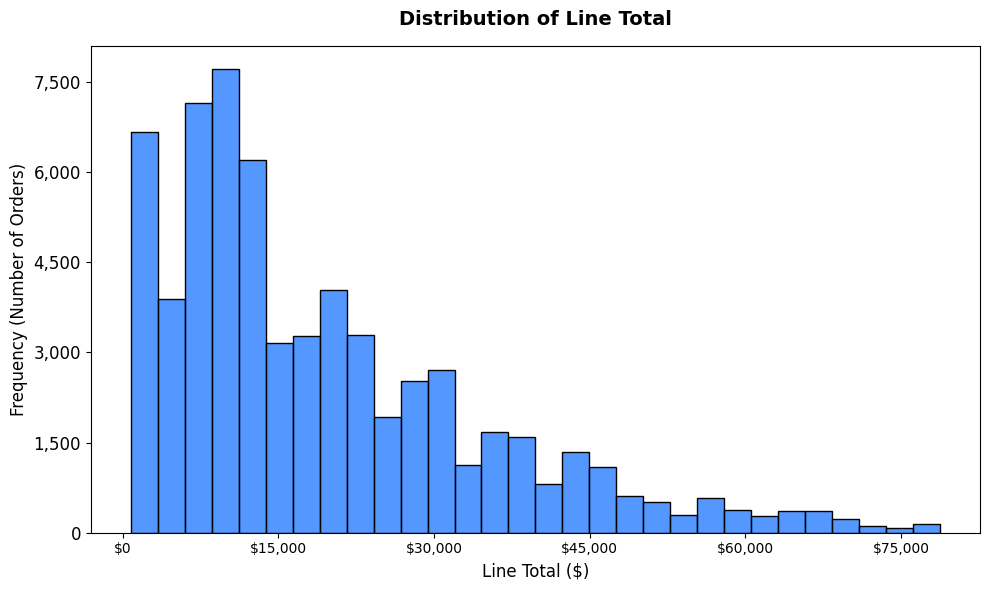

In [41]:
# Assuming df_merged is loaded with Sales Orders data
# Verify Line Total is numeric
df_merged['Line Total'] = pd.to_numeric(df_merged['Line Total'], errors='coerce')

# Create a figure
plt.figure(figsize=(10, 6))

# Plot histogram with optimized bins
sns.histplot(df_merged['Line Total'], bins=30, color='#1a75ff', edgecolor='black')

# Customize the plot
plt.title('Distribution of Line Total', fontsize=14, weight='bold', pad=15)
plt.xlabel('Line Total ($)', fontsize=12)
plt.ylabel('Frequency (Number of Orders)', fontsize=12)

# Improve x-axis clarity (dollar formatting)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=8))  # ~8 ticks

# Improve y-axis clarity
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))  # Comma-separated counts
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, nbins=8))  # ~8 integer ticks
plt.gca().tick_params(axis='y', labelsize=12, labelcolor='black')  # Larger, bold y-axis labels

# Add gridlines and style
sns.set_style("whitegrid")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

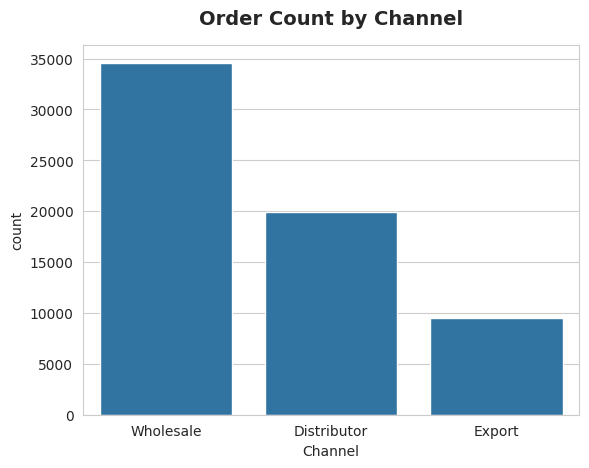

In [42]:
# Countplot for Channel
sns.countplot(x='Channel',data=df_merged)
plt.title('Order Count by Channel', fontsize=14, weight='bold',pad=15)
plt.show()

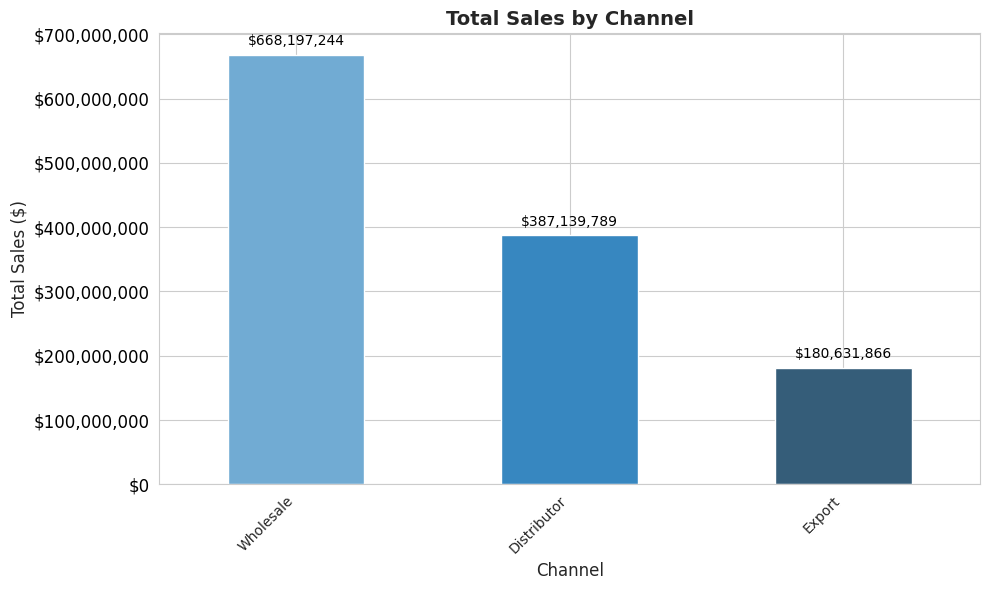

In [43]:
sales_by_channel = df_merged.groupby('Channel')['Line Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bars = sales_by_channel.plot(kind='bar', color=sns.color_palette("Blues_d", n_colors=len(sales_by_channel)))
plt.title('Total Sales by Channel', fontsize=14, weight='bold')
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=8))
plt.gca().tick_params(axis='y', labelsize=12, labelcolor='black')
for bar in bars.patches:
    plt.annotate(f'${bar.get_height():,.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black',
                 xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()


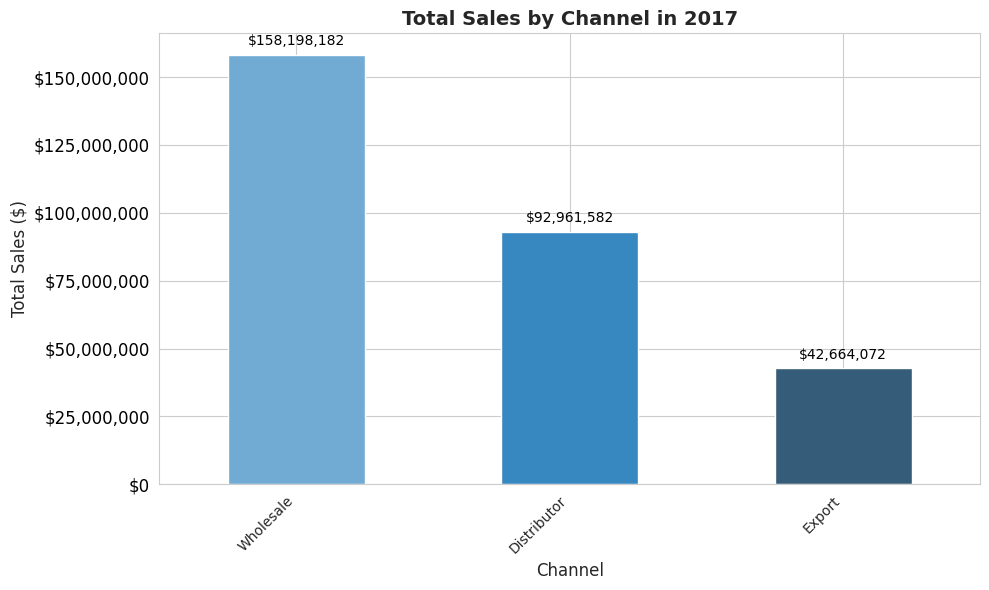

In [44]:
sales_by_channel = df_merged[df_merged['OrderDate'].dt.year == 2017].groupby('Channel')['Line Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bars = sales_by_channel.plot(kind='bar', color=sns.color_palette("Blues_d", n_colors=len(sales_by_channel)))
plt.title('Total Sales by Channel in 2017', fontsize=14, weight='bold')
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=8))
plt.gca().tick_params(axis='y', labelsize=12, labelcolor='black')
for bar in bars.patches:
    plt.annotate(f'${bar.get_height():,.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black',
                 xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

In [45]:
#Bivariate Analysis

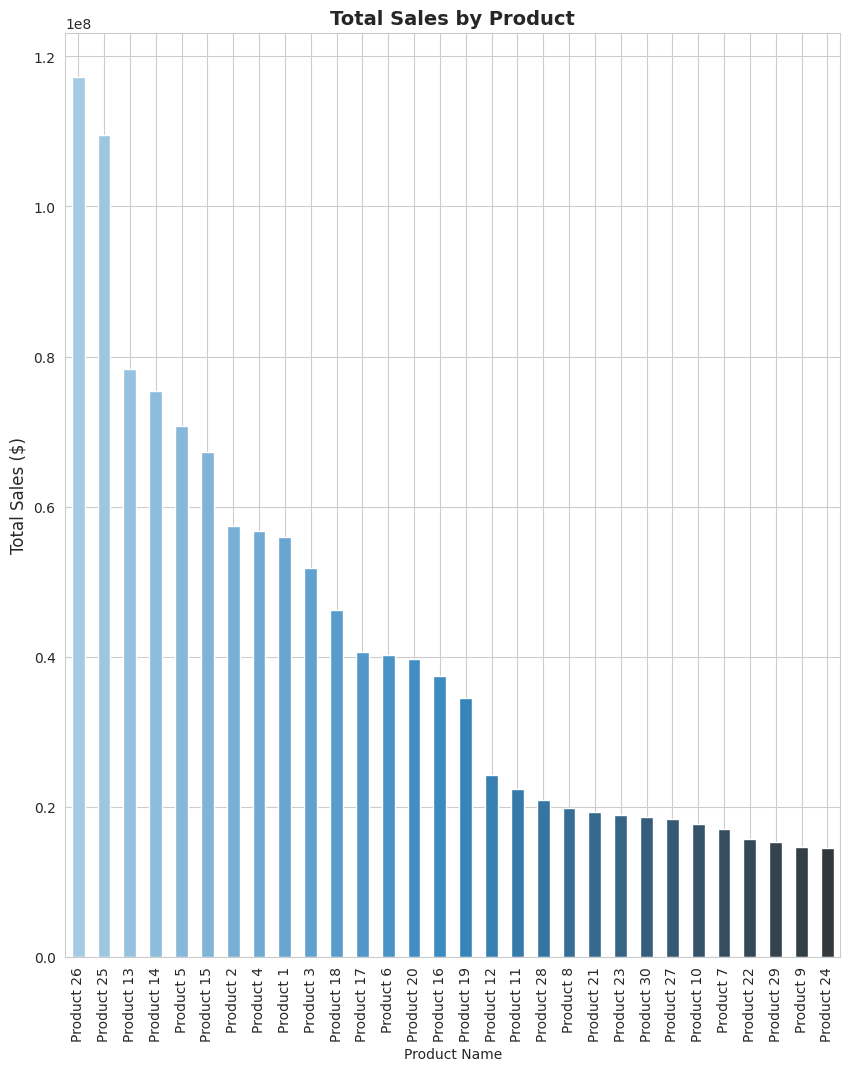

In [46]:
sales_by_product = df_merged.groupby('Product Name')['Line Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 12))
plt.ylabel('Total Sales ($)', fontsize=12)
plt.title('Total Sales by Product', fontsize=14, weight='bold')
bars = sales_by_product.plot(kind='bar', color=sns.color_palette("Blues_d", n_colors=30))

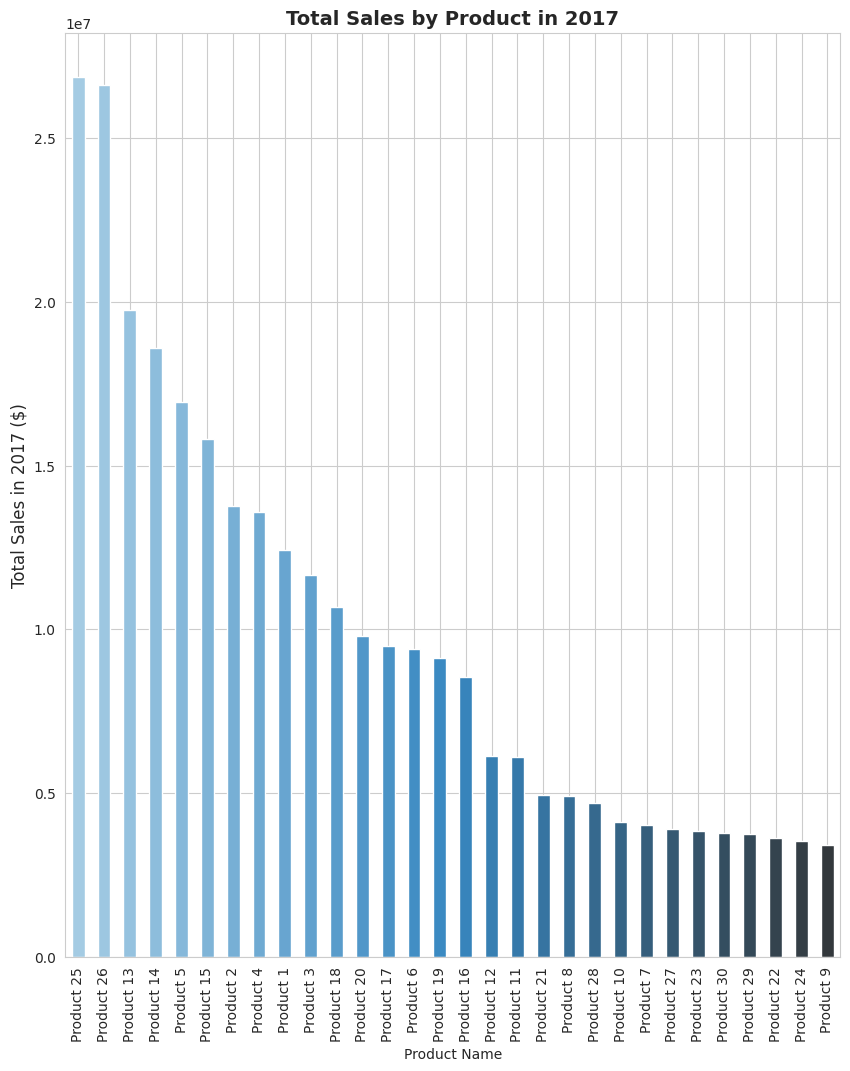

In [47]:
sales_by_product = df_merged[df_merged['OrderDate'].dt.year == 2017].groupby('Product Name')['Line Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 12))
plt.ylabel('Total Sales in 2017 ($)', fontsize=12)
plt.title('Total Sales by Product in 2017', fontsize=14, weight='bold')
bars = sales_by_product.plot(kind='bar', color=sns.color_palette("Blues_d", n_colors=30))

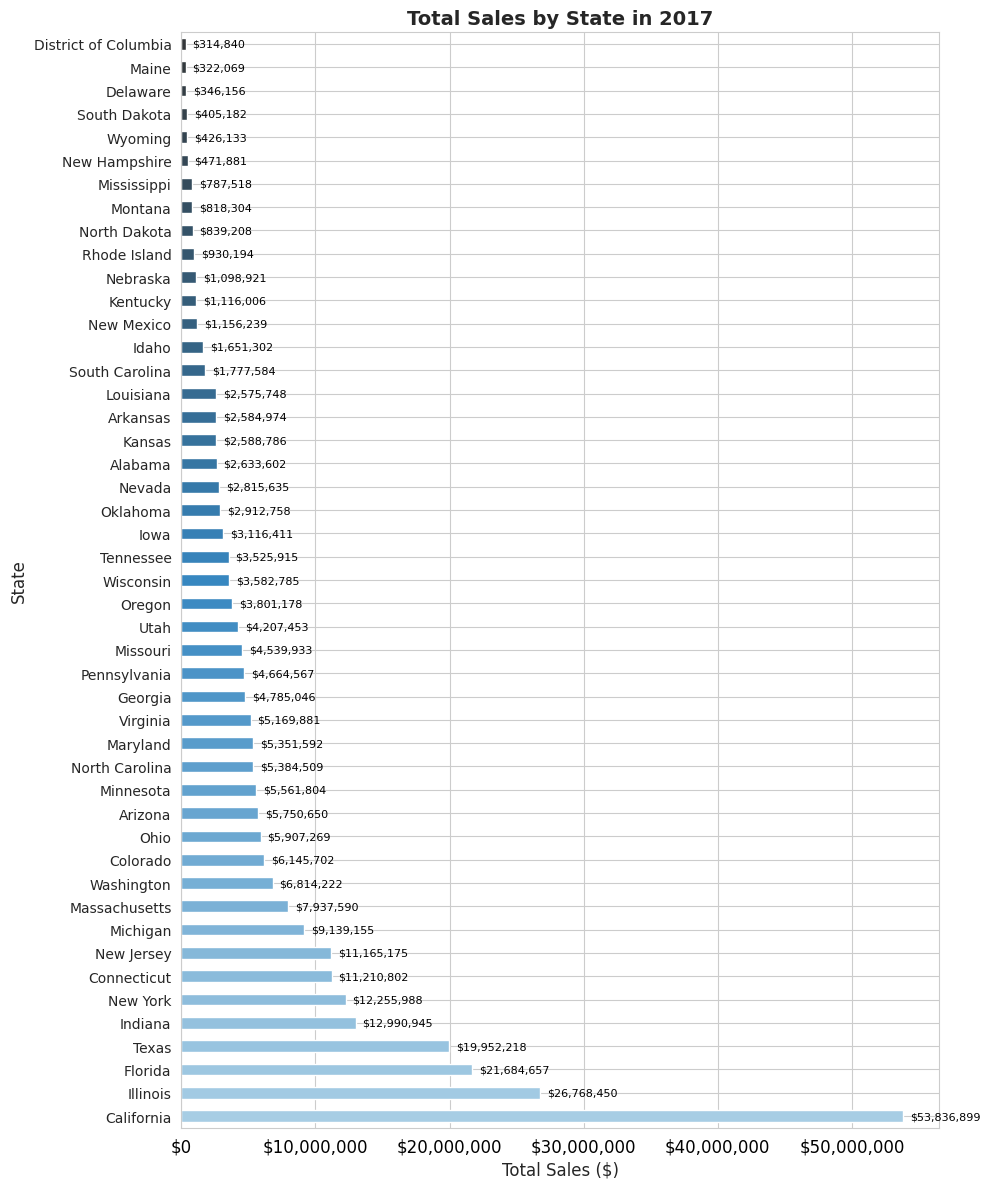

In [48]:
sales_by_state = df_merged[df_merged['OrderDate'].dt.year == 2017].groupby('State')['Line Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 12))
bars = sales_by_state.plot(kind='barh', color=sns.color_palette("Blues_d", n_colors=len(sales_by_state)))
plt.title('Total Sales by State in 2017', fontsize=14, weight='bold')
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.gca().tick_params(axis='x', labelsize=12, labelcolor='black')
for i, bar in enumerate(bars.patches):
    plt.annotate(f'${bar.get_width():,.0f}',
                 (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 ha='left', va='center', fontsize=8, color='black',
                 xytext=(5, 0), textcoords='offset points')
plt.tight_layout()
plt.show()

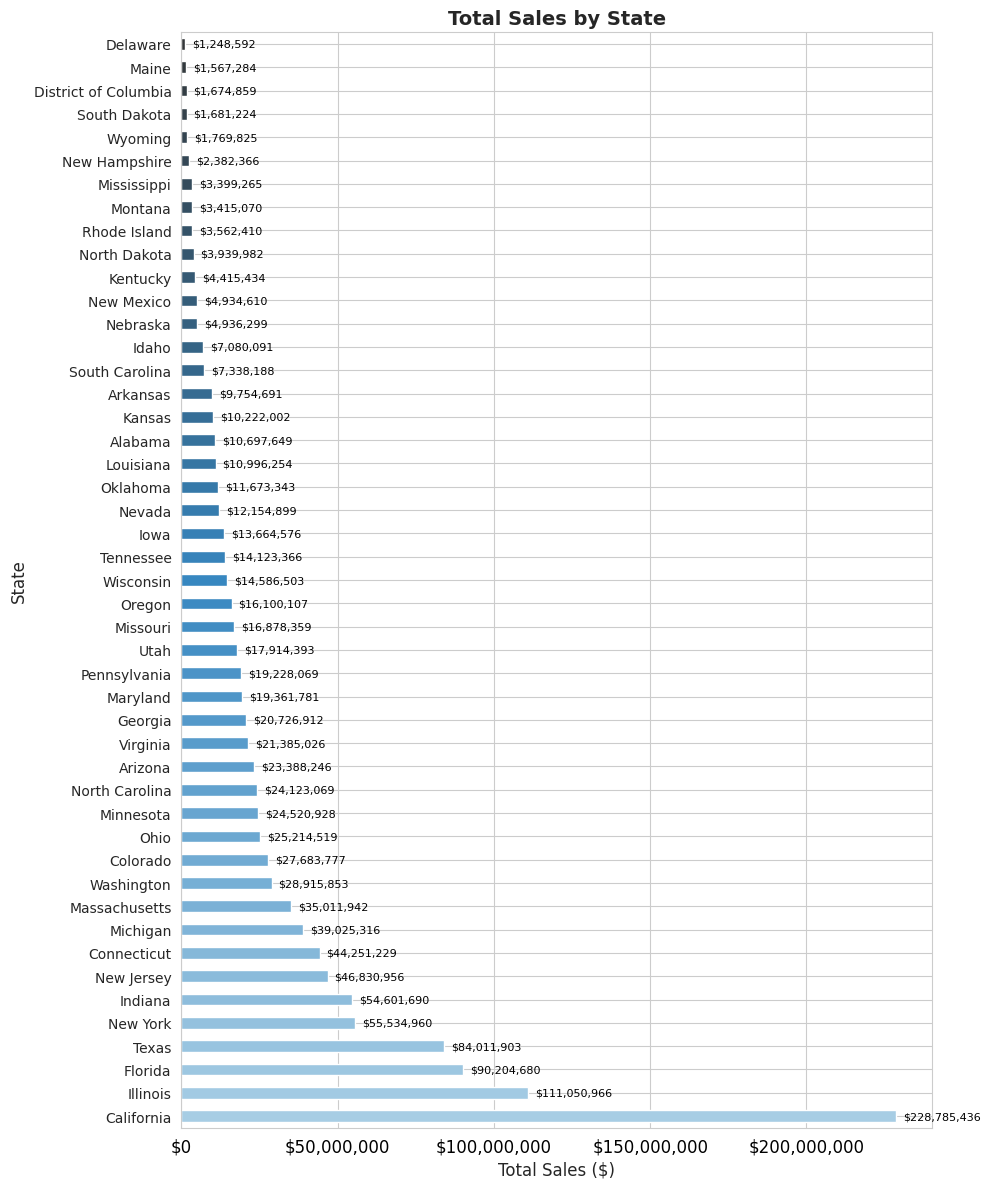

In [49]:
sales_by_state = df_merged.groupby('State')['Line Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 12))
bars = sales_by_state.plot(kind='barh', color=sns.color_palette("Blues_d", n_colors=len(sales_by_state)))
plt.title('Total Sales by State', fontsize=14, weight='bold')
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.gca().tick_params(axis='x', labelsize=12, labelcolor='black')
for i, bar in enumerate(bars.patches):
    plt.annotate(f'${bar.get_width():,.0f}',
                 (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 ha='left', va='center', fontsize=8, color='black',
                 xytext=(5, 0), textcoords='offset points')
plt.tight_layout()
plt.show()

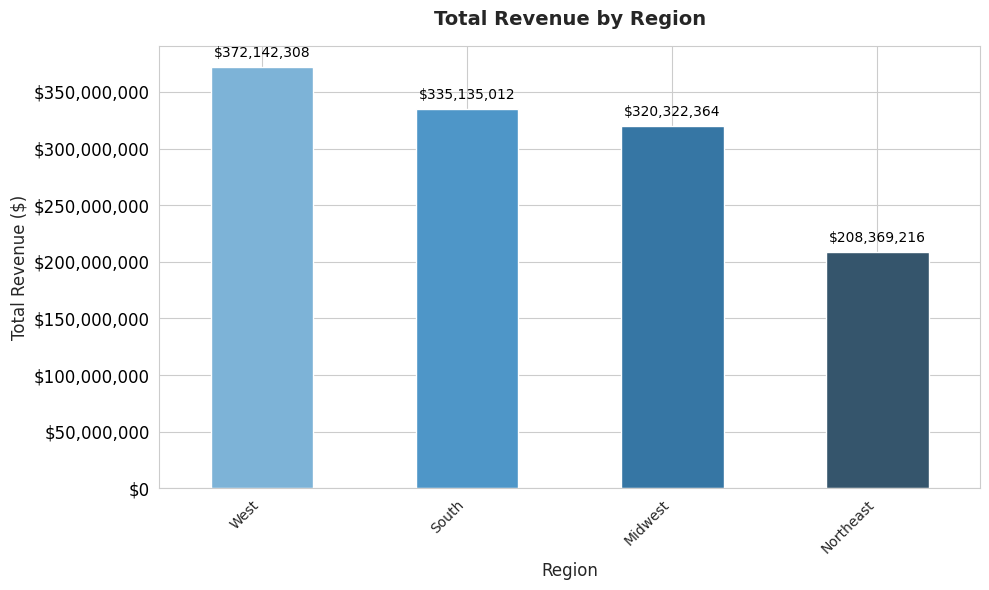

In [50]:
#Revenue by region
revenue_by_region = df_merged.groupby('Region')['Line Total'].sum().sort_values(ascending=False)
# Plot bar chart for revenue by region
plt.figure(figsize=(10, 6))
bars = revenue_by_region.plot(kind='bar', color=sns.color_palette("Blues_d", n_colors=len(revenue_by_region)))
plt.title('Total Revenue by Region', fontsize=14, weight='bold', pad=15)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=8))
plt.gca().tick_params(axis='y', labelsize=12, labelcolor='black')
for bar in bars.patches:
    plt.annotate(f'${bar.get_height():,.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black',
                 xytext=(0, 5), textcoords='offset points')
plt.tight_layout()

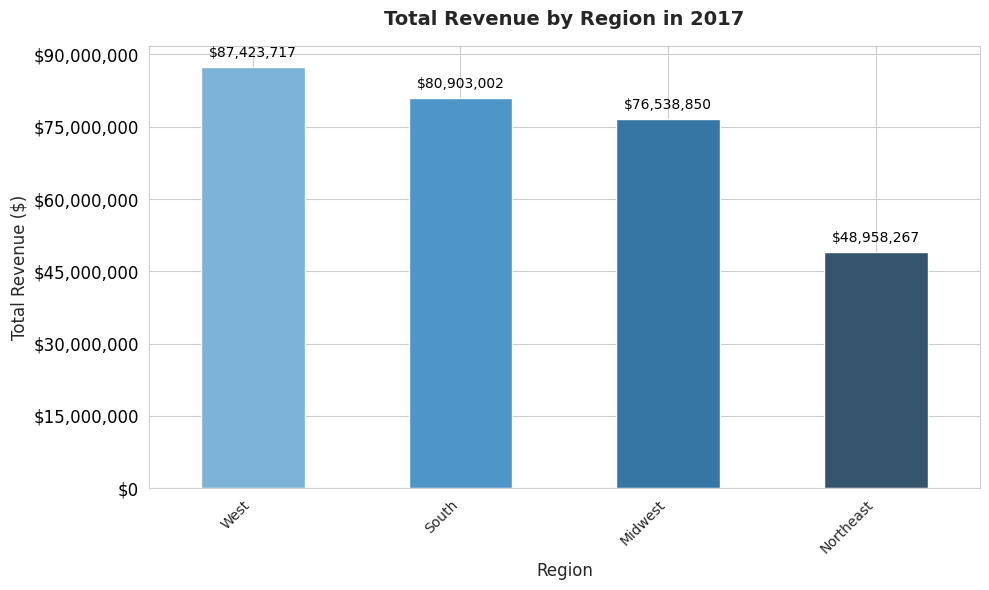

In [51]:
#Revenue by region in 2017
revenue_by_region = df_merged[df_merged['OrderDate'].dt.year == 2017].groupby('Region')['Line Total'].sum().sort_values(ascending=False)
# Plot bar chart for revenue by region
plt.figure(figsize=(10, 6))
bars = revenue_by_region.plot(kind='bar', color=sns.color_palette("Blues_d", n_colors=len(revenue_by_region)))
plt.title('Total Revenue by Region in 2017', fontsize=14, weight='bold', pad=15)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=8))
plt.gca().tick_params(axis='y', labelsize=12, labelcolor='black')
for bar in bars.patches:
    plt.annotate(f'${bar.get_height():,.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black',
                 xytext=(0, 5), textcoords='offset points')
plt.tight_layout()

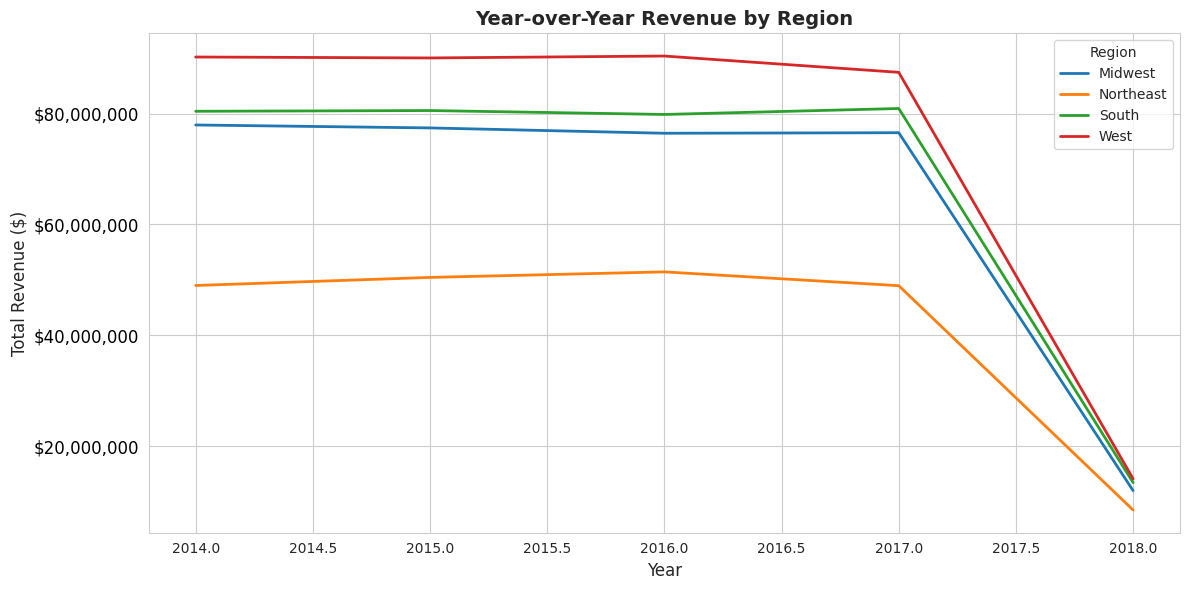

In [52]:
# Year-over-year revenue by region
df_merged['Year'] = df_merged['OrderDate'].dt.year
yoy_revenue = df_merged.groupby(['Year', 'Region'])['Line Total'].sum().unstack()
plt.figure(figsize=(12, 6))
for region in yoy_revenue.columns:
    plt.plot(yoy_revenue.index, yoy_revenue[region], label=region, linewidth=2)
plt.title('Year-over-Year Revenue by Region', fontsize=14, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.gca().tick_params(axis='y', labelsize=12, labelcolor='black')
plt.legend(title='Region', fontsize=10)
plt.tight_layout()
plt.show()

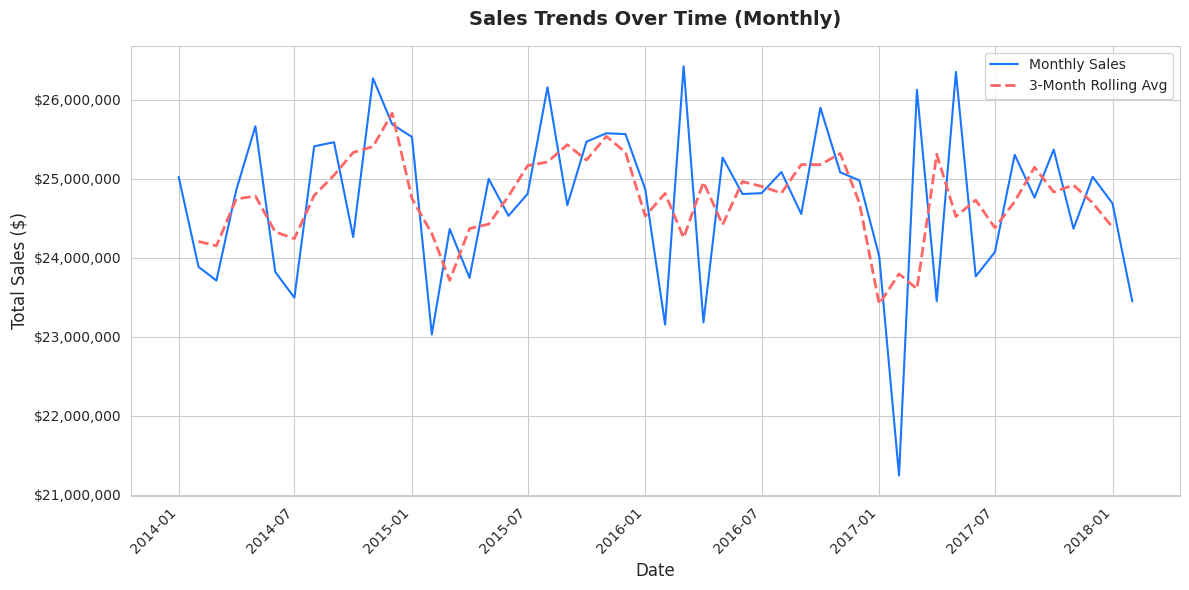

In [53]:

# Extract year and month for grouping
df_merged['YearMonth'] = df_merged['OrderDate'].dt.to_period('M')

# Aggregate Line Total by month
sales_trends = df_merged.groupby('YearMonth')['Line Total'].sum().reset_index()

# Convert YearMonth back to datetime for plotting
sales_trends['YearMonth'] = sales_trends['YearMonth'].dt.to_timestamp()

# Calculate a 3-month rolling average to smooth trends
sales_trends['Rolling_Avg'] = sales_trends['Line Total'].rolling(window=3, center=True).mean()

# Set seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create a figure
plt.figure(figsize=(12, 6))

# Plot the line chart for total sales and rolling average
plt.plot(sales_trends['YearMonth'], sales_trends['Line Total'], label='Monthly Sales', color='#1a75ff', linewidth=1.5)
plt.plot(sales_trends['YearMonth'], sales_trends['Rolling_Avg'], label='3-Month Rolling Avg', color='#ff6666', linewidth=2, linestyle='--')

# Customize the plot
plt.title('Sales Trends Over Time (Monthly)', fontsize=14, weight='bold', pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=10)

# Format y-axis with dollar signs and commas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

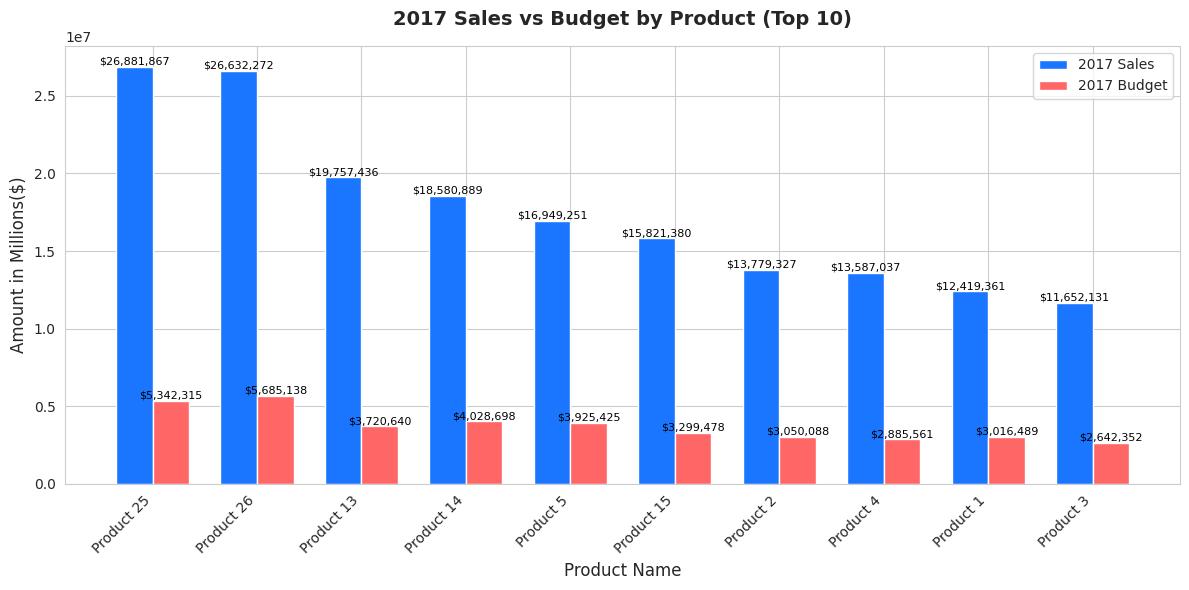

In [58]:
# Sort by Line Total and select top 10 products to avoid clutter
budget_comparison = budget_comparison.sort_values('Line Total', ascending=False).head(10)

# Set seaborn style for better aesthetics (optional)
sns.set_style("whitegrid")

# Create a figure with a larger size
plt.figure(figsize=(12, 6))

# Set the positions for the bars
bar_width = 0.35
x = range(len(budget_comparison))

# Plot bars for Line Total and 2017 Budgets
plt.bar([i - bar_width/2 for i in x], budget_comparison['Line Total'], bar_width, label='2017 Sales', color='#1a75ff')
plt.bar([i + bar_width/2 for i in x], budget_comparison['2017 Budgets'], bar_width, label='2017 Budget', color='#ff6666')

# Customize the plot
plt.title('2017 Sales vs Budget by Product (Top 10)', fontsize=14, weight='bold', pad=15)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Amount in Millions($)', fontsize=12)
plt.xticks(x, budget_comparison['Product Name'], rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=10)

# Add value labels on top of bars
for i in x:
    plt.text(i - bar_width/2, budget_comparison['Line Total'].iloc[i] + 5000,
             f'${budget_comparison["Line Total"].iloc[i]:,.0f}',
             ha='center', va='bottom', fontsize=8, color='black')
    plt.text(i + bar_width/2, budget_comparison['2017 Budgets'].iloc[i] + 5000,
             f'${budget_comparison["2017 Budgets"].iloc[i]:,.0f}',
             ha='center', va='bottom', fontsize=8, color='black')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

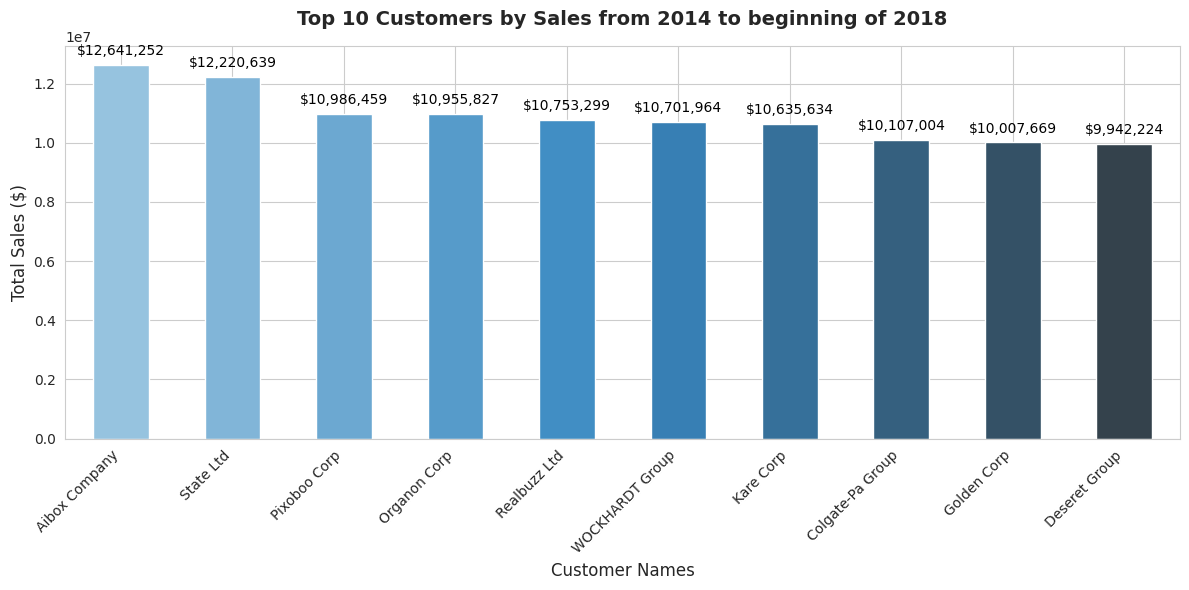

In [55]:
top_customers = df_merged.groupby('Customer Names')['Line Total'].sum().nlargest(10)

# Set the style for better aesthetics
sns.set_style("whitegrid")

# Create a figure with a larger size
plt.figure(figsize=(12, 6))

# Plot the bar chart with a color palette
bars = top_customers.plot(kind='bar', color=sns.color_palette("Blues_d", n_colors=10))

# Customize the plot
plt.title('Top 10 Customers by Sales from 2014 to beginning of 2018', fontsize=14, weight='bold', pad=15)
plt.xlabel('Customer Names', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)

# Rotate x-axis labels and adjust font size to prevent overlap
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add value labels on top of each bar for clarity
for bar in bars.patches:
    bars.annotate(f'${bar.get_height():,.0f}',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                  textcoords='offset points')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

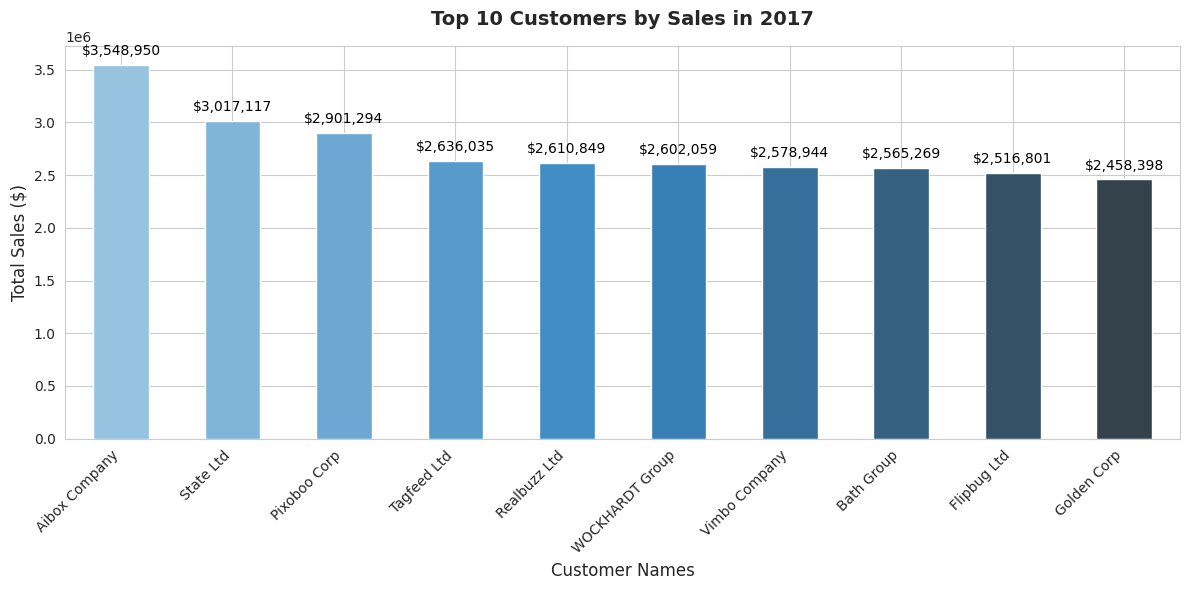

In [56]:
top_customers = df_merged[df_merged['OrderDate'].dt.year == 2017].groupby('Customer Names')['Line Total'].sum().nlargest(10)

# Set the style for better aesthetics
sns.set_style("whitegrid")

# Create a figure with a larger size
plt.figure(figsize=(12, 6))

# Plot the bar chart with a color palette
bars = top_customers.plot(kind='bar', color=sns.color_palette("Blues_d", n_colors=10))

# Customize the plot
plt.title('Top 10 Customers by Sales in 2017', fontsize=14, weight='bold', pad=15)
plt.xlabel('Customer Names', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)

# Rotate x-axis labels and adjust font size to prevent overlap
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add value labels on top of each bar for clarity
for bar in bars.patches:
    bars.annotate(f'${bar.get_height():,.0f}',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                  textcoords='offset points')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

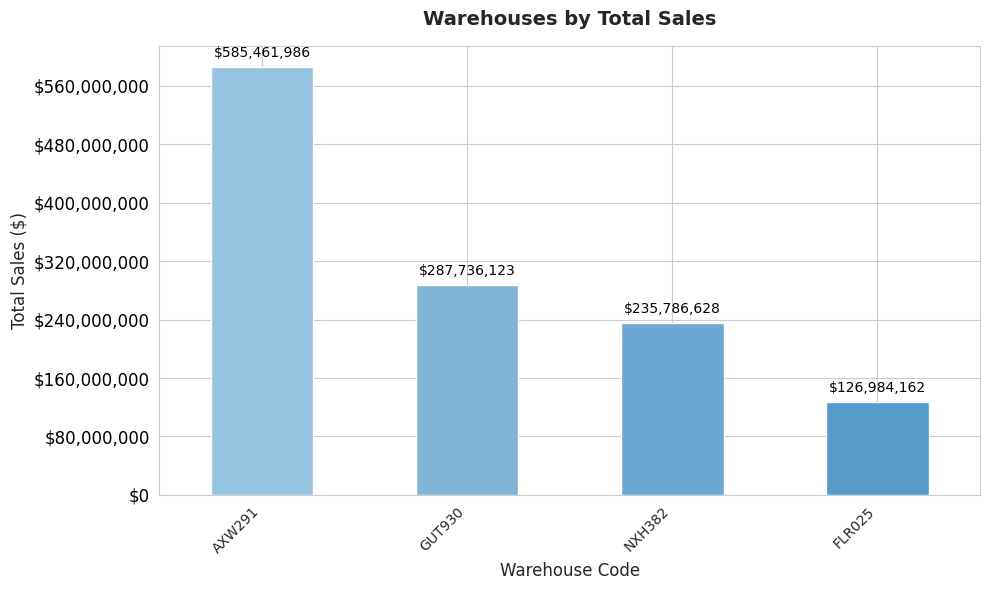

In [57]:
Top_Warehouse_performance = df_merged.groupby('Warehouse Code')['Line Total'].sum().nlargest(10)

# Set seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the bar chart
bars = Top_Warehouse_performance.plot(kind='bar', color=sns.color_palette("Blues_d", n_colors=10))

# Customize the plot
plt.title('Warehouses by Total Sales', fontsize=14, weight='bold', pad=15)
plt.xlabel('Warehouse Code', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)

# Rotate x-axis labels slightly for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Improve y-axis clarity
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))  # Dollar format, no decimals
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=8))  # ~8 ticks for clarity
plt.gca().tick_params(axis='y', labelsize=12, labelcolor='black')  # Larger, bold y-axis labels

# Add value labels on top of bars
for bar in bars.patches:
    bars.annotate(f'${bar.get_height():,.0f}',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', fontsize=10, color='black',
                  xytext=(0, 5), textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()